a)	Implement Gaussian Blur and Box Blur from scratch using OpenCV. Compare their effects on an image (lena.jpg) and explain when each would be preferred.

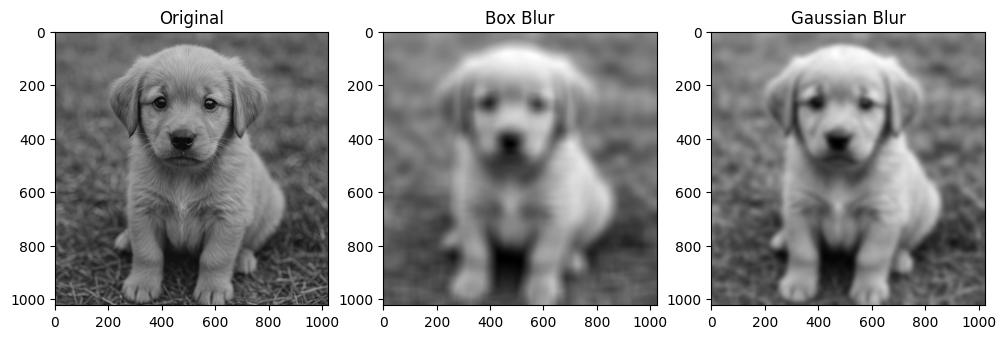

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/Doggy Photo Sample.png', cv2.IMREAD_GRAYSCALE)

# Box Blur (Averaging)
kernel_size = 51
box_blur = cv2.blur(image, (kernel_size, kernel_size))

# Gaussian Blur
gaussian_blur = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

# Display results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(box_blur, cmap='gray')
plt.title('Box Blur')

plt.subplot(1, 3, 3)
plt.imshow(gaussian_blur, cmap='gray')
plt.title('Gaussian Blur')

plt.show()


b)	Apply Sobel filters in both X and Y directions. Combine them to obtain edge magnitude and direction. Compare the results with the Laplacian filter.

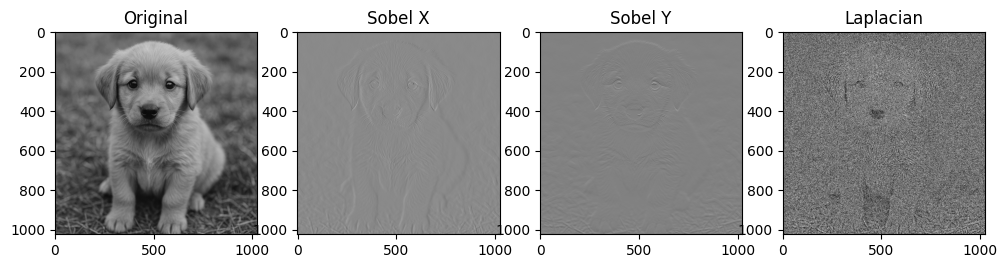

In [6]:
# Sobel Filters
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Compute Edge Magnitude
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_magnitude = np.uint8(sobel_magnitude * 255 / np.max(sobel_magnitude))

# Laplacian Filter
laplacian = cv2.Laplacian(image, cv2.CV_64F, ksize=3)
laplacian = np.uint8(laplacian * 255 / np.max(laplacian))

# Display results
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')

plt.subplot(1, 4, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')

plt.subplot(1, 4, 3)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')

plt.subplot(1, 4, 4)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')

plt.show()


c)	Implement Canny edge detection without using cv2.Canny(). Use a combination of Gaussian blur, gradient detection (Sobel), and thresholding.

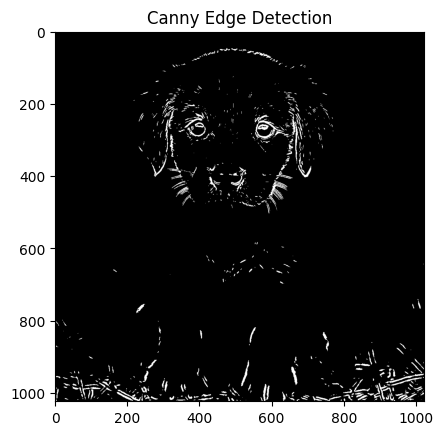

In [7]:
# Gaussian Blur
blurred = cv2.GaussianBlur(image, (5, 5), 1.4)

# Compute Sobel Gradients
grad_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

# Compute Gradient Magnitude and Angle
magnitude = np.sqrt(grad_x**2 + grad_y**2)
angle = np.arctan2(grad_y, grad_x) * 180 / np.pi

# Normalize Magnitude
magnitude = np.uint8(magnitude * 255 / np.max(magnitude))

# Apply Thresholding
_, thresholded = cv2.threshold(magnitude, 50, 255, cv2.THRESH_BINARY)

# Display result
plt.imshow(thresholded, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()


d)	Design a sharpening filter using a custom kernel and apply it to an image. Experiment with different kernel values and explain their effects.

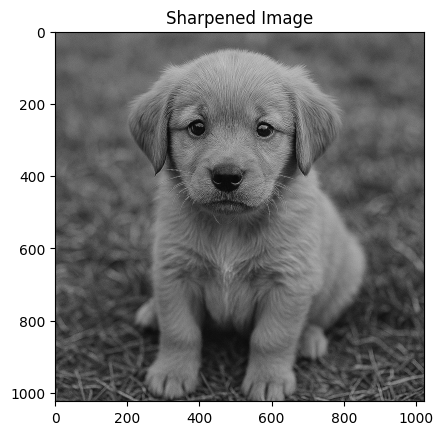

In [8]:
# Custom sharpening kernel
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])

# Apply filter
sharpened = cv2.filter2D(image, -1, sharpening_kernel)

# Display result
plt.imshow(sharpened, cmap='gray')
plt.title('Sharpened Image')
plt.show()


e)	Apply an emboss filter to an image and modify its kernel to enhance the effect. What changes in the kernel result in a more pronounced embossing effect?

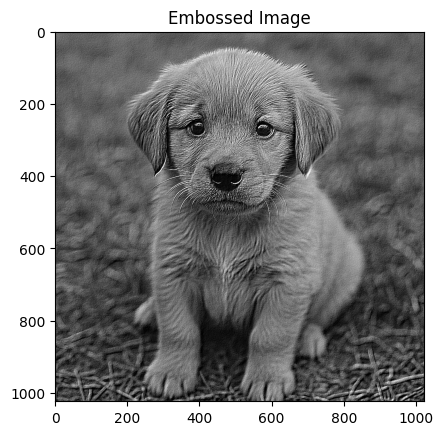

In [9]:
# Emboss kernel
emboss_kernel = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                          [0, 1, 2]])

# Apply emboss filter
embossed = cv2.filter2D(image, -1, emboss_kernel)

# Display result
plt.imshow(embossed, cmap='gray')
plt.title('Embossed Image')
plt.show()


f)	Create a high-pass filter using OpenCV and compare its effect with an edge enhancement filter. Discuss their applications in feature extraction for deep learning.

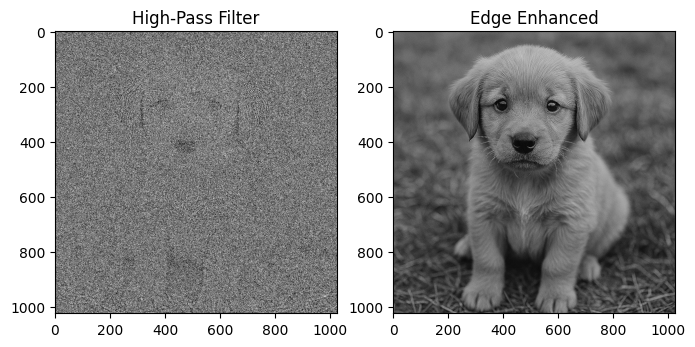

In [10]:
# High-pass filter (Laplacian)
high_pass = cv2.Laplacian(image, cv2.CV_64F)
high_pass = np.uint8(high_pass * 255 / np.max(high_pass))

# Edge Enhancement (Sharpening)
sharpened = cv2.filter2D(image, -1, sharpening_kernel)

# Display results
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(high_pass, cmap='gray')
plt.title('High-Pass Filter')

plt.subplot(1, 2, 2)
plt.imshow(sharpened, cmap='gray')
plt.title('Edge Enhanced')

plt.show()


**Indoor vs. Outdoor Image Classification:**

a)	Find and load indoor vs. outdoor image dataset (DIML/CVL RGB-D Dataset). Perform preprocessing steps including image resizing, normalization, and data augmentation. Explain why each step is necessary for deep learning models.


In [13]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load Places365 dataset
dataset, info = tfds.load("places365_small", split="train", with_info=True, as_supervised=True)

print(info)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/places365_small/incomplete.7OP12F_2.1.0/places365_small-train.tfrecord*...…

KeyboardInterrupt: 

b)	Design and train a convolutional neural network (CNN) from scratch for indoor vs. outdoor classification. Tune hyperparameters (number of layers, kernel size, batch size, learning rate) and analyze how they affect the model’s performance.

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
model.fit(train_generator, epochs=10)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'train_generator' is not defined